In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
%matplotlib inline
sns.set(color_codes=True)

credit_data=pd.read_csv('creditcard.csv')
n=credit_data.shape[0]
credit_data.index=range(1,n+1)
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 1 to 284807
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(credit_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
credit_data.Time

1              0.0
2              0.0
3              1.0
4              1.0
5              2.0
            ...   
284803    172786.0
284804    172787.0
284805    172788.0
284806    172788.0
284807    172792.0
Name: Time, Length: 284807, dtype: float64

In [7]:
credit_data.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [8]:
duplicate_data=credit_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',credit_data.shape)
print('Shape of dataset after dropping duplicates:',duplicate_data.shape)

Shape of Original dataset: (284807, 31)
Shape of dataset after dropping duplicates: (283726, 31)


Since, Shape of dataset after dropping duplicates is less, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [9]:
credit_data=duplicate_data
credit_data.shape

(283726, 31)

In [10]:
credit_data.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,...,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253
1,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,473,473,473,473,473,473


# Data Visualisation

Text(0.5, 1.0, 'Amount v/s Time')

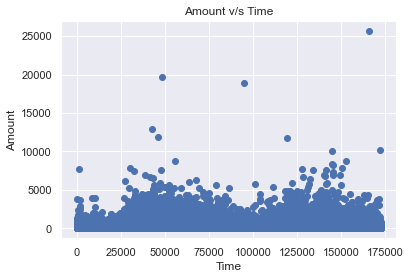

In [11]:
plt.scatter(credit_data['Time'],credit_data['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Amount v/s Time')

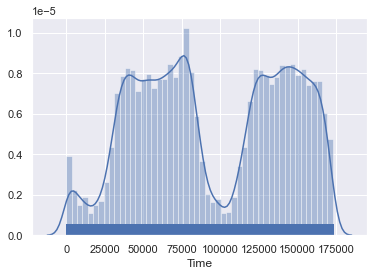

In [12]:
sns.distplot(credit_data['Time'],rug=True)

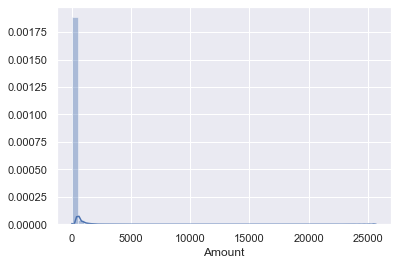

In [13]:
sns.distplot(credit_data['Amount'])

Text(0.5, 1.0, 'Normalized data')

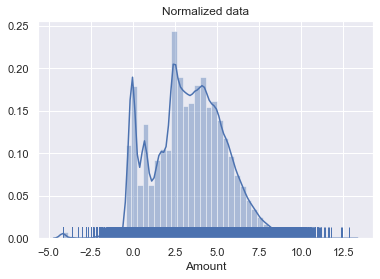

In [14]:
i=credit_data.Amount>0
Original_Amount=credit_data.Amount.loc[i]
Normalized_Amount=pd.Series(stats.boxcox(Original_Amount)[0],name='Amount',index=Original_Amount.index)

sns.distplot(Normalized_Amount,rug=True)
plt.title('Normalized data')

In [15]:
print('Original positive amounts:\n',Original_Amount.head())
print('Min:',Original_Amount.min())
print('Max:',Original_Amount.max())
print('-'*25)
print('Normalized positive amounts:\n',Normalized_Amount.head())
print('Min:',Normalized_Amount.min())
print('Max:',Normalized_Amount.max())

Original positive amounts:
 1    149.62
2      2.69
3    378.66
4    123.50
5     69.99
Name: Amount, dtype: float64
Min: 0.01
Max: 25691.16
-------------------------
Normalized positive amounts:
 1    5.604902
2    1.011474
3    6.787275
4    5.366581
5    4.672878
Name: Amount, dtype: float64
Min: -4.167208427773361
Max: 12.811654613584814


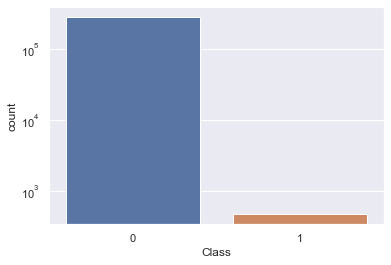

In [16]:
pl=sns.countplot(credit_data['Class'])
pl.set_yscale('log')

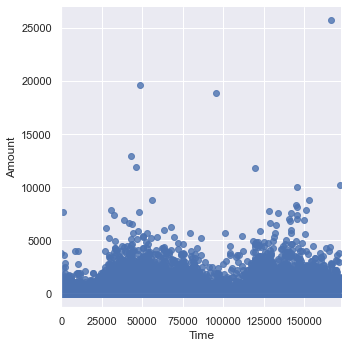

In [17]:
sns.lmplot(x='Time',y='Amount',data=credit_data)

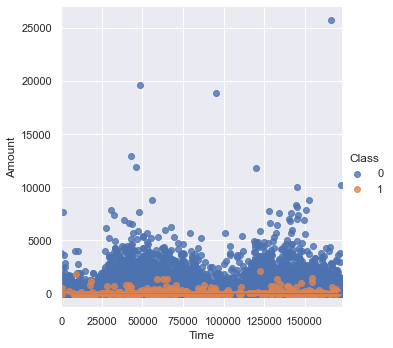

In [18]:
sns.lmplot(x='Time',y='Amount',hue='Class',data=credit_data)

This shows that each of transaction amount that is associated with fraud is less as compared to normal transaction amount. 

In [19]:
features=credit_data.iloc[:,1:29]
print(features)

               V1         V2        V3        V4        V5        V6  \
1       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
2        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
3       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
4       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
5       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284803 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284804  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284805   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284806  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284807  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V19       V20  \
1       0.239599  0.098698  0.363787  0.090794  ...  0.40399

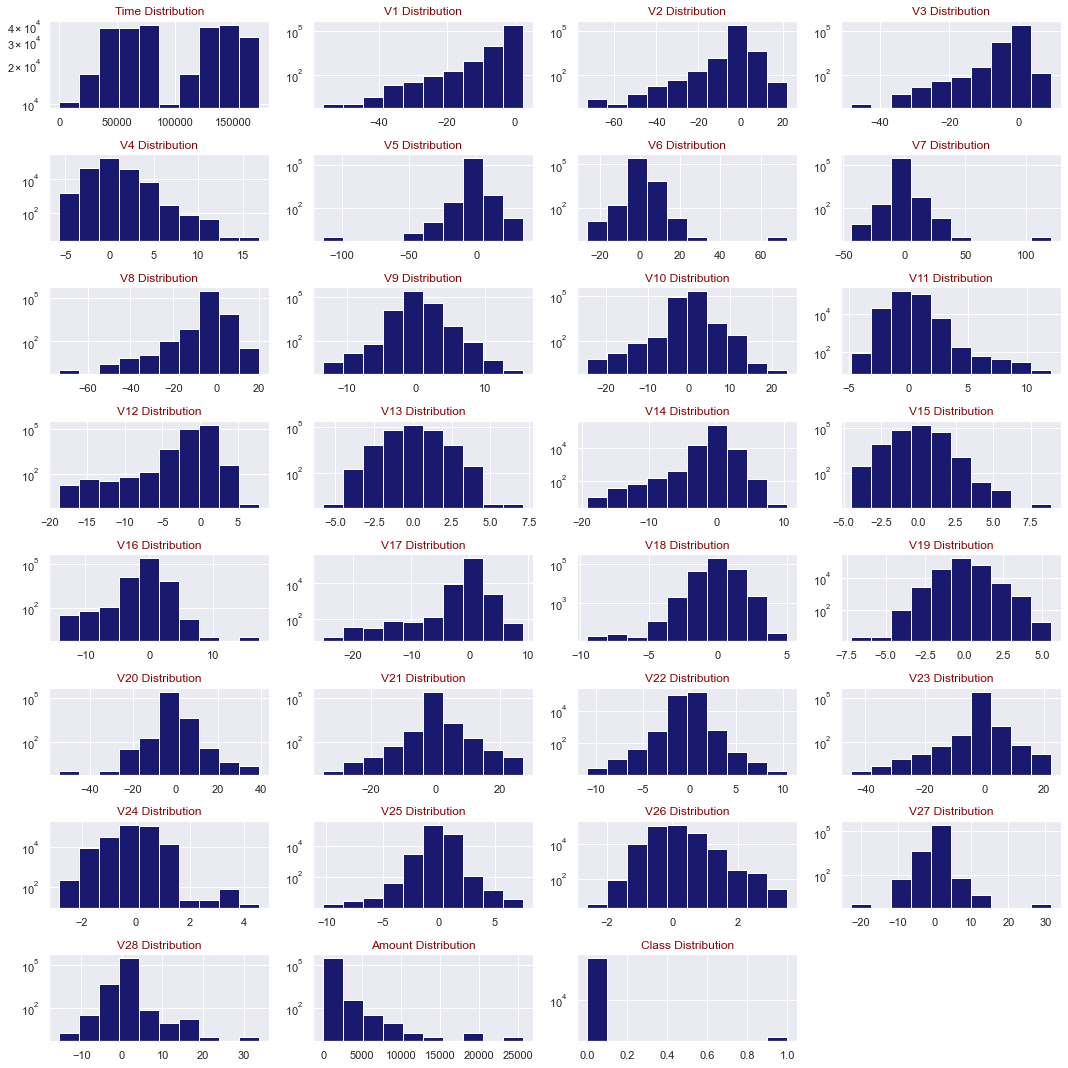

In [20]:
RP=plt.figure(figsize=(15,15))
for i, feature in enumerate(credit_data.columns):
    r=RP.add_subplot(8,4,i+1)
    credit_data[feature].hist(bins=10,ax=r,facecolor='midnightblue')
    r.set_title(feature+" Distribution",color='DarkRed')
    r.set_yscale('log')
RP.tight_layout()  
plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.

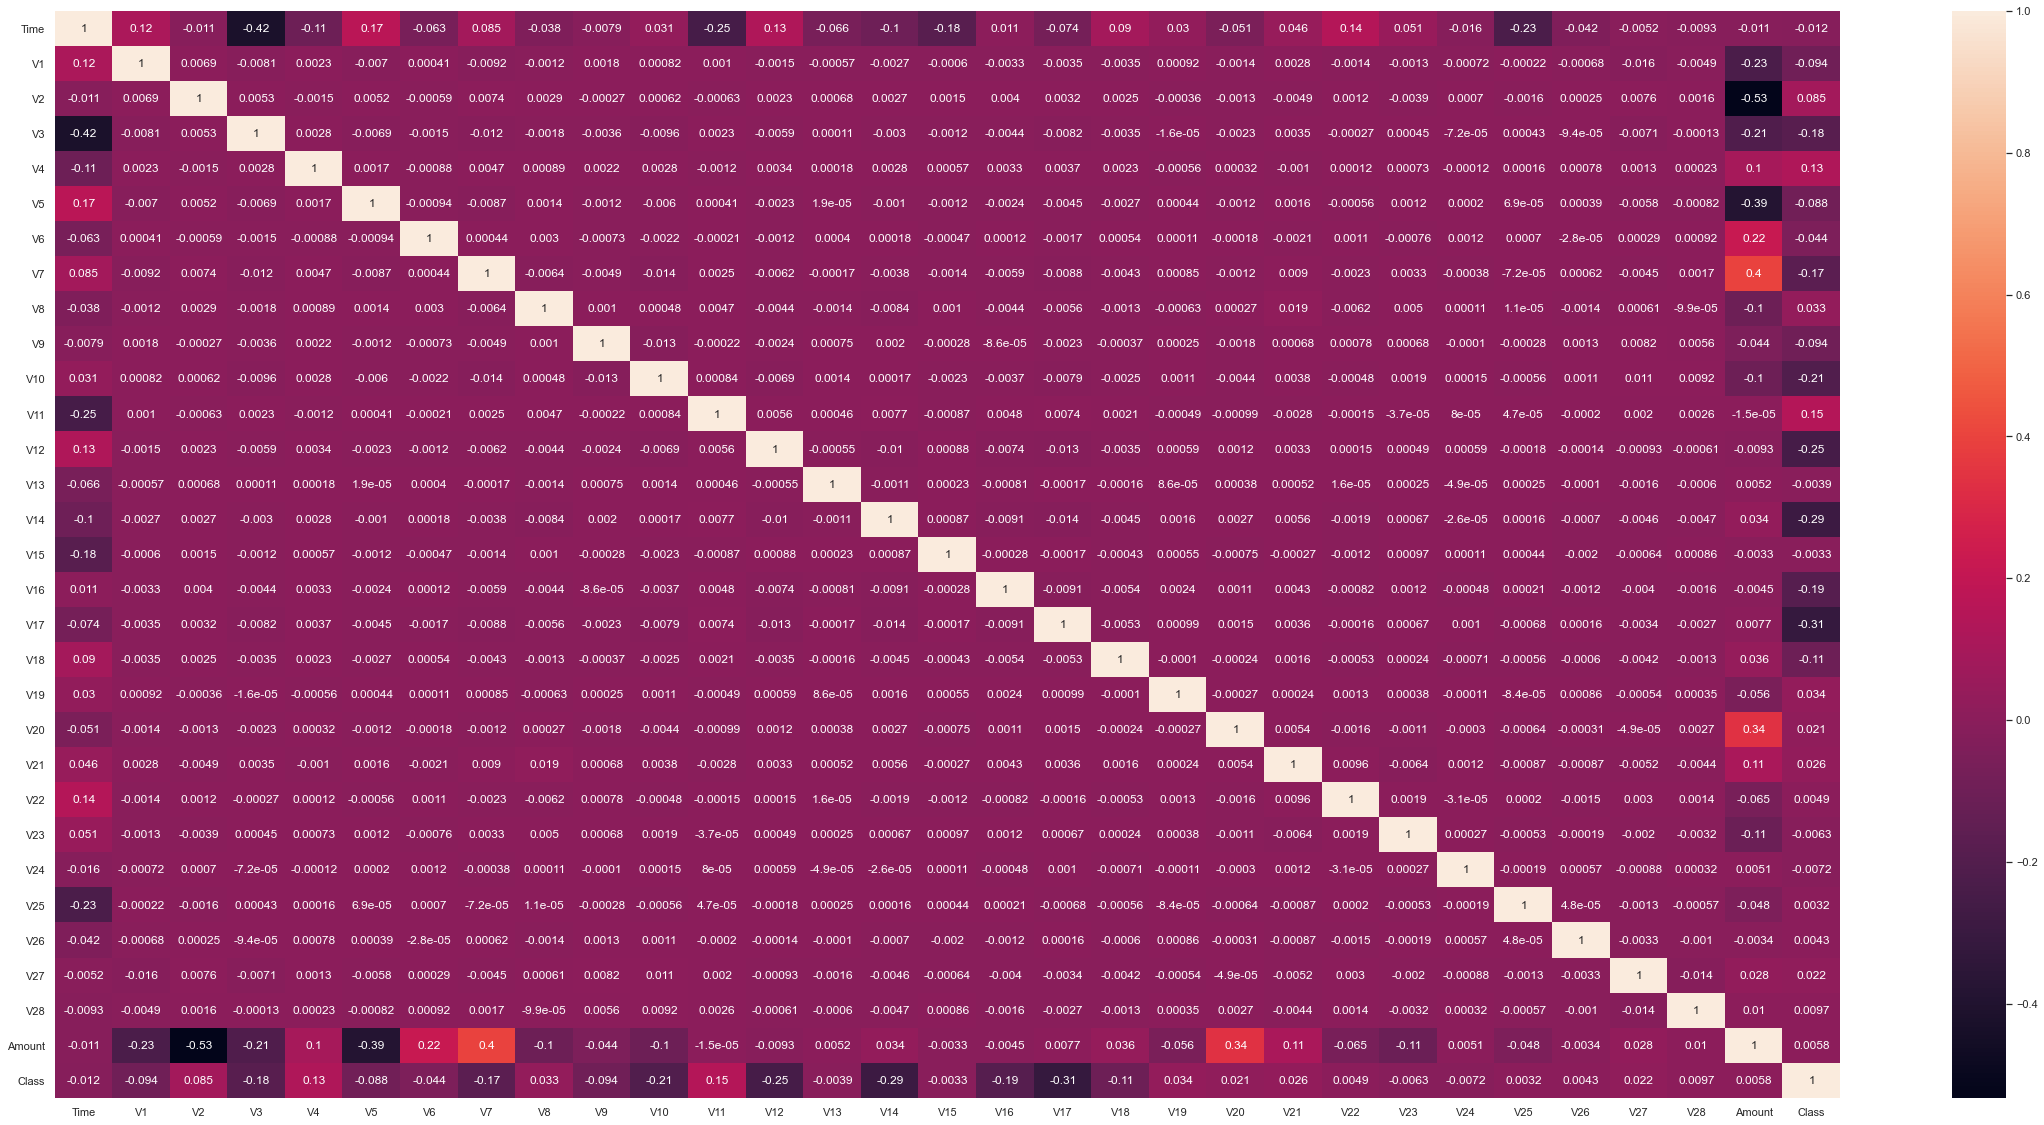

In [21]:
correlation_features=credit_data.corr()
print(correlation_features)
plt.figure(figsize=(40,20))
sns.heatmap(correlation_features,annot=True)

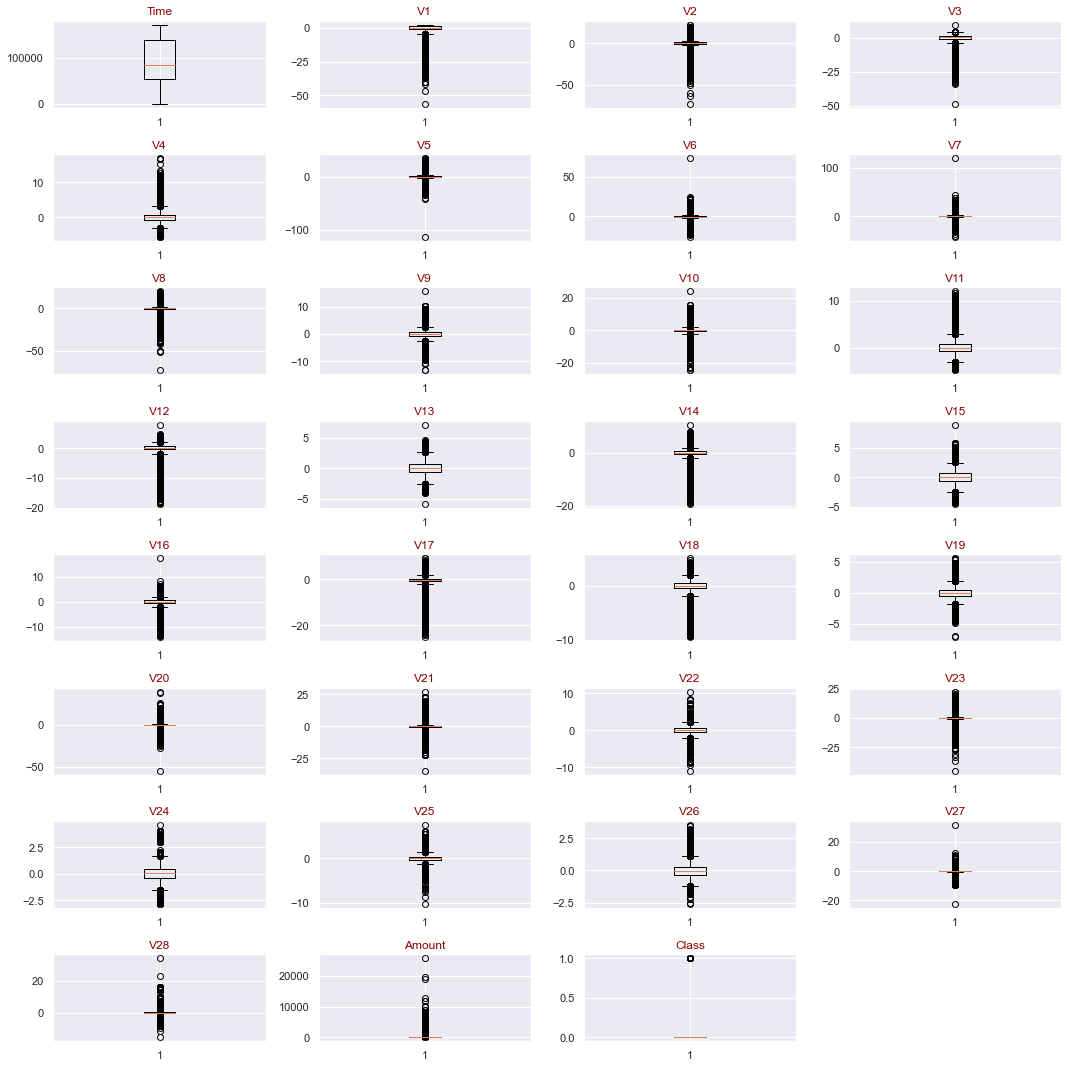

In [22]:
RP=plt.figure(figsize=(15,15))
for i, feature in enumerate(credit_data.columns):
    r=RP.add_subplot(8,4,i+1)
    plt.boxplot(credit_data[feature],data=credit_data)
    r.set_title(feature,color='DarkRed')
RP.tight_layout()  
plt.show()

This shows the dataset contains a lot of outliers.